<a href="https://colab.research.google.com/github/Sankalp1BM21AI141/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection And Processing

In [ ]:
#load the data from csv file to pandas dataframe
rp=pd.read_csv('/content/WineQuality_Prediction.csv')

In [ ]:
#printing first five rows of the data frame
rp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#check the number of missing values in each column
rp.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis

In [ ]:
#getting some statistical measures from the data
rp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#number of rows and columns
rp.shape

(1599, 12)

Data Visualization

In [ ]:
#Calculating the correaltion
correlation=rp.corr()

<Axes: >

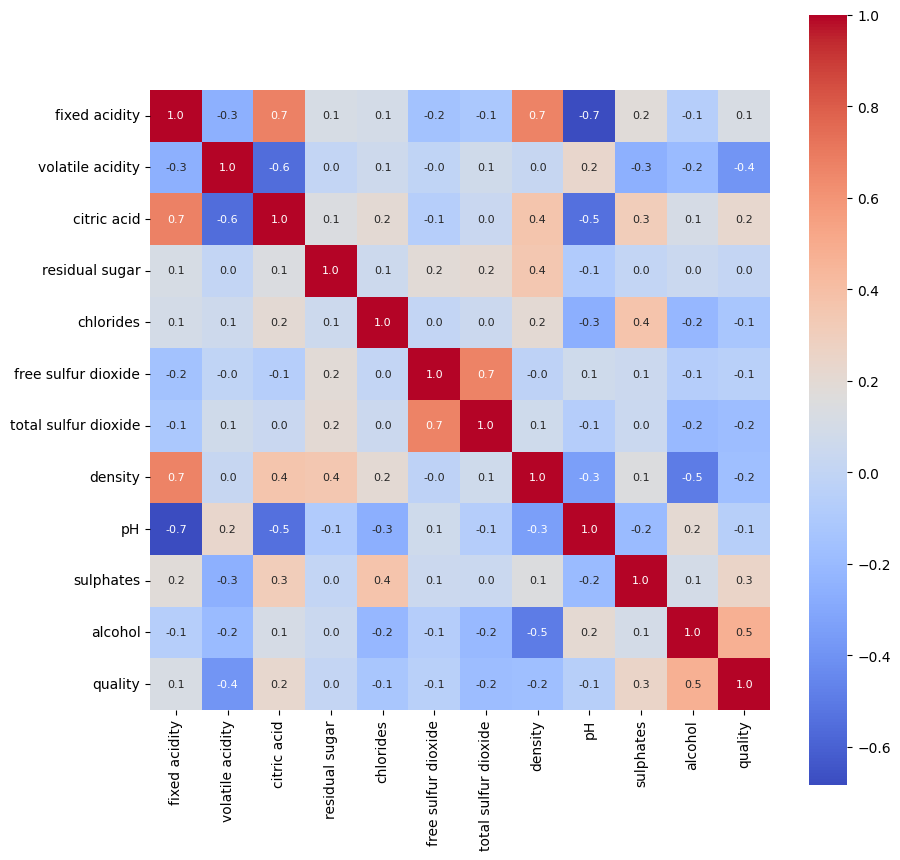

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot= True , annot_kws={'size':8}, cmap='coolwarm')

Seperating Features and Target

In [ ]:
x=rp.drop(['quality'],axis=1)
y=rp['quality']

In [ ]:
x.head()
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Spliting the data into Training data and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training

In [ ]:
#using XGBRegressor Model
model=XGBRegressor()

In [ ]:
#training the regression Model with the training data
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction=model.predict(x_train)

In [ ]:
print(training_data_prediction)

[5.9778185 6.063206  5.9859486 ... 6.006181  5.9830937 7.012389 ]


Model Evaluation

In [ ]:
# calculating the error on training data
score_1=metrics.r2_score(y_train,training_data_prediction)
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print('R Squared error: ',score_1)
print('Mean_absolute_error: ',score_2)

R Squared error:  0.9972378556705804
Mean_absolute_error:  0.02751844296518763


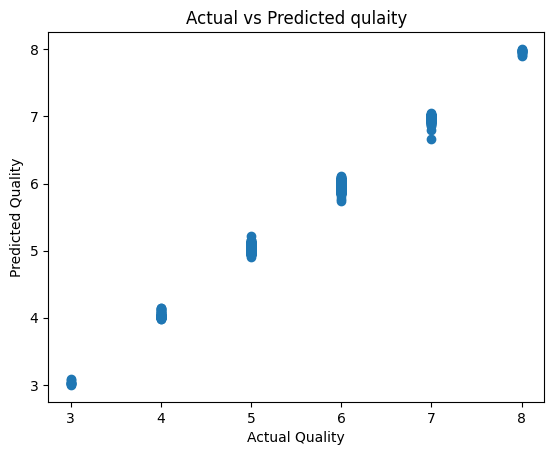

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title("Actual vs Predicted qulaity")
plt.show()

In [ ]:
training_data_prediction=model.predict(x_test)

In [ ]:
# Calculating error on test data
score_1=metrics.r2_score(y_test,training_data_prediction)
score_2=metrics.mean_absolute_error(y_test,training_data_prediction)
print('R Squared error: ',score_1)
print('Mean_absolute_error: ',score_2)

R Squared error:  0.39308297946553394
Mean_absolute_error:  0.42808758914470674


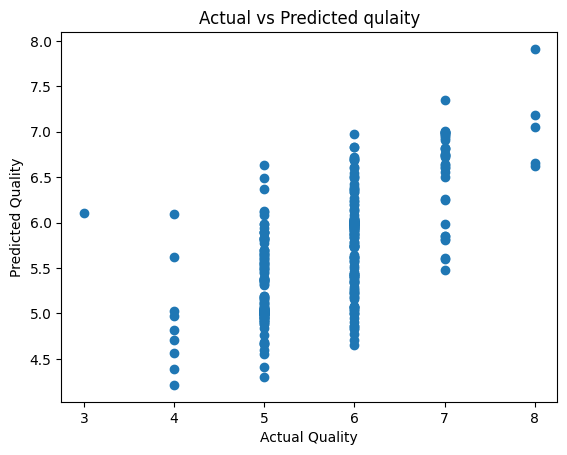

In [ ]:
plt.scatter(y_test,training_data_prediction)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title("Actual vs Predicted qulaity")
plt.show()